## Regularização

Este exercício tem por objetivo estimular a prática de conceitos de regularização.

Há duas opções para se fazer regularização com Regressão Linear:
    
```python
linear = SGDRegressor(max_iter = 5000, alpha = 0.0001, eta0 = 0.01).fit(X,y)
```

onde alpha codifica o quanto de regularização será aplicada.

Ou:
    
```python
linear = Ridge(alpha=1.0).fit(X,y)
```

onde alpha codifica o quanto de regularização será aplicada.

As duas implementações seguem escalas diferentes para alpha. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html">SGDRegressor</a> aplica descida do gradiente e <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge">Ridge</a> aplica regularização no método de mínimos quadrados.

Utilizaremos as mesmas bases de dados para experimentação


In [92]:
import pandas as pd
from sklearn import preprocessing

dados_adv = pd.read_csv('Advertising.csv', index_col=0)

dados_por = pd.read_csv('Portland_housePrices.csv', index_col=None)

#Normalizando entrada
min_max_scaler = preprocessing.MinMaxScaler()
dados_adv.loc[:,['TV','radio','newspaper']] = min_max_scaler.fit_transform(dados_adv.loc[:,['TV','radio','newspaper']].values) 

Primeiramente, dividiremos a base em conjuntos de teste e treinamento

In [93]:
import numpy as np
#30% de teste, 70% de treinamento
msk_adv = np.random.rand(len(dados_adv)) < 0.7
msk_por = np.random.rand(len(dados_por)) < 0.7

train_adv = dados_adv[msk_adv]
test_adv = dados_adv[~msk_adv]

train_por = dados_por[msk_por]
test_por = dados_por[~msk_por]

Como podemos saber se a regularização está mesmo afetando o modelo?

Primeiramente, como baseline, testamos o modelo sem regressão nas bases de teste e treino (utilizaremos como métrica o erro quadrático médio <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">mse</a>).

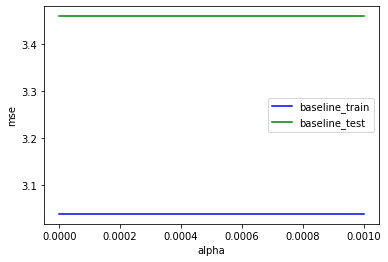

In [95]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.linear_model import SGDRegressor
import numpy as np


#Separando os atributos das variáveis de resposta nos conjuntos
X_train = train_adv.loc[:,['TV','radio','newspaper']]
y_train = train_adv.loc[:,['sales']]

X_test = test_adv.loc[:,['TV','radio','newspaper']]
y_test = test_adv.loc[:,['sales']]



#Treinando o modelo no conjunto de treino
modelo = SGDRegressor(max_iter=10000).fit(X_train,y_train.values.ravel())
#Predizendo o conjunto de teste
y_pred = modelo.predict(X_test)

#Calculando o erro de teste e de treino
erro_train_baseline = mean_squared_error(y_train, modelo.predict(X_train))
erro_test_baseline = mean_squared_error(y_test, y_pred)

#Eixo X do gráfico, intervalo contínuo entre 0 e 1
T = np.linspace(0., 1., num=100)


plt.plot(T, [erro_train_baseline]*len(T),color='b',label='baseline_train')
plt.plot(T, [erro_test_baseline]*len(T),color='g',label='baseline_test')
plt.xlabel('alpha')
plt.ylabel('mse')
plt.legend()

## Exercício 1
Tomando como base o gráfico acima com o baseline sem Regularização, altere a codificação abaixo para calcular o erro de treino e teste do classificador linear com diferentes valores de alpha, imprimindo no gráfico os valores observados.

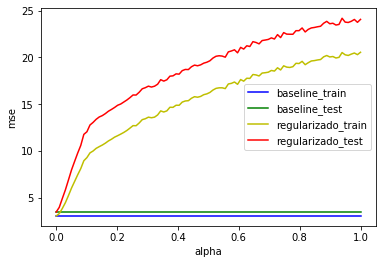

In [101]:
from sklearn.linear_model import SGDRegressor
#Eixo X do gráfico, intervalo contínuo entre 0 e 1
T = np.linspace(0., 1., num=100)


plt.plot(T, [erro_train_baseline]*len(T),color='b',label='baseline_train')
plt.plot(T, [erro_test_baseline]*len(T),color='g',label='baseline_test')

# alphas testados vão de 0 a 1, sempre checar a documentação da implementação para ver quais
# valores fazem sentido
alphas_test = np.linspace(0., 1., num=100)

erros_train = []
erros_test = []
for alpha in alphas_test:
    modelo_regularizado =  SGDRegressor(alpha=alpha,max_iter=10000).fit(X_train, y_train.values.ravel())
    y_pred = modelo_regularizado.predict(X_test)
    erros_train.append(mean_squared_error(y_train, modelo_regularizado.predict(X_train)))
    erros_test.append(mean_squared_error(y_test, y_pred))
    
plt.plot(alphas_test, erros_train,color='y',label='regularizado_train')
plt.plot(alphas_test, erros_test,color='r',label='regularizado_test')    


plt.xlabel('alpha')
plt.ylabel('mse')
plt.legend()



## Exercício 2

1) Com base nos resultados observados, é possível afirmar que o classificador sem regulização estava em overfitting?

2) Verifique agora a outra base de dados, a resposta é a mesma?

## Regularização com Árvore
É possível aplicar regularização na árvore de muitas maneiras:
   
```python
tree = DecisionTreeRegressor(max_depth = None, min_samples_split = 2, 
                             min_samples_leaf=1, max_leaf_nodes = None).fit(X,y)
```
<i>max_depth</i> - Maior altura permitida para a árvore, a regularização será realizada limitando o tamanho

<i>min_samples_split</i> - Impede criar um nó na árvore que particiona os dados se houver um número menor de amostras para aquela partição que este parâmetro

<i>min_samples_leaf</i> - Nenhum novo nó folha é criado de modo a ser o classificador de menos exemplos que esse parâmetro

<i>max_leaf_nodes</i> - Número máximo de folhas para a árvore

## Exercício 3

1) Faça o mesmo tipo de análise para a árvore, alterando o valor dos parâmetros e observando o erro

2) Qual parâmetro é mais simples de alterar e se observar um resultado bom?

3) Foi possível obter um resultado melhor com regularização do que sem? Qual é a sua hipótese para explicar os resultados?
    

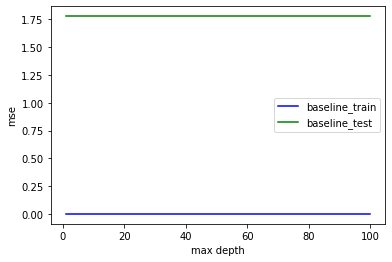

In [8]:
#Árvore não requer normalização
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

dados_adv = pd.read_csv('Advertising.csv', index_col=0)

dados_por = pd.read_csv('Portland_housePrices.csv', index_col=None)
import numpy as np

#30% de teste, 70% de treinamento
msk_adv = np.random.rand(len(dados_adv)) < 0.7
msk_por = np.random.rand(len(dados_por)) < 0.7

train_adv = dados_adv[msk_adv]
test_adv = dados_adv[~msk_adv]

train_por = dados_por[msk_por]
test_por = dados_por[~msk_por]

#Separando os atributos das variáveis de resposta nos conjuntos
X_train = train_adv.loc[:,['TV','radio','newspaper']]
y_train = train_adv.loc[:,['sales']]

X_test = test_adv.loc[:,['TV','radio','newspaper']]
y_test = test_adv.loc[:,['sales']]



#Treinando o modelo no conjunto de treino
modelo = DecisionTreeRegressor().fit(X_train,y_train.values.ravel())
#Predizendo o conjunto de teste
y_pred = modelo.predict(X_test)

#Calculando o erro de teste e de treino
erro_train_baseline = mean_squared_error(y_train, modelo.predict(X_train))
erro_test_baseline = mean_squared_error(y_test, y_pred)


T = np.linspace(1., 100., num=100)


plt.plot(T, [erro_train_baseline]*len(T),color='b',label='baseline_train')
plt.plot(T, [erro_test_baseline]*len(T),color='g',label='baseline_test')
plt.xlabel('max depth')
plt.ylabel('mse')
plt.legend()

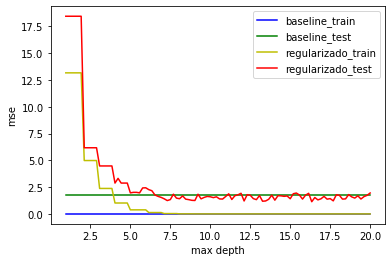

In [12]:
T =  np.linspace(1., 20., num=100)


plt.plot(T, [erro_train_baseline]*len(T),color='b',label='baseline_train')
plt.plot(T, [erro_test_baseline]*len(T),color='g',label='baseline_test')


depth_test =  np.linspace(1., 20., num=100)

erros_train = []
erros_test = []
for depth in depth_test:
    modelo_regularizado =  DecisionTreeRegressor(max_depth=depth).fit(X_train, y_train.values.ravel())
    y_pred = modelo_regularizado.predict(X_test)
    erros_train.append(mean_squared_error(y_train, modelo_regularizado.predict(X_train)))
    erros_test.append(mean_squared_error(y_test, y_pred))
    
plt.plot(depth_test, erros_train,color='y',label='regularizado_train')
plt.plot(depth_test, erros_test,color='r',label='regularizado_test')    


plt.xlabel('max depth')
plt.ylabel('mse')
plt.legend()
